In [1]:
# coding:utf-8

import pandas as pd
import numpy as np
import os,sys
from multiprocessing import Pool
import matplotlib.pyplot as plt

In [2]:
t_login = pd.read_csv('../datas/t_login.csv')
t_login['time'] = t_login['time'].astype(pd.Timestamp)
t_login['timestamp_online'] = t_login['timestamp'] + t_login['timelong']
t_login['result'] = t_login['result'].map(lambda x: x == 1 and 1 or -1)
t_login.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19,1.428642e+09
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45,1.428825e+09
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20,1.427705e+09
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18,1.428309e+09
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01,1.428221e+09


In [42]:
dt = t_login[t_login['time']>='2015-03-01 00:00:00']
dt = dt.sort_values('timestamp') \
                .reset_index(drop=True)

In [43]:
dt.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online,ym
0,1.894101e+15,20997.0,1022011,1,1099238,44,-1,1.425139e+09,3,82149,False,False,2015-03-01 00:00:02,1.425160e+09,2015-03-
1,5.827410e+15,2000.0,835072,2,739582,63,-1,1.425139e+09,3,23704,False,False,2015-03-01 00:00:37,1.425141e+09,2015-03-
2,8.887874e+15,2758.0,837324,1,574034,488,1,1.425139e+09,3,173093,False,False,2015-03-01 00:01:15,1.425142e+09,2015-03-
3,7.380721e+15,8000.0,367944,2,470679,194,-1,1.425139e+09,3,128098,False,False,2015-03-01 00:01:35,1.425147e+09,2015-03-
4,1.364725e+16,8000.0,367944,2,470679,194,-1,1.425139e+09,3,128098,False,False,2015-03-01 00:01:43,1.425147e+09,2015-03-


In [44]:
dtt = dt[dt['time']>='2015-04-01 00:00:00']
dtt.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online,ym
101421,1.442511e+16,13130.0,812921,1,385900,217,-1,1.427818e+09,2,111553,False,False,2015-04-01 00:00:04,1.427831e+09,2015-04-
101422,4.721558e+14,24690.0,812921,1,385900,217,1,1.427818e+09,2,111553,False,False,2015-04-01 00:00:16,1.427842e+09,2015-04-
101423,1.939157e+15,1790.0,412258,1,194231,211,1,1.427818e+09,3,1195,False,False,2015-04-01 00:00:29,1.427819e+09,2015-04-
101424,2.886586e+16,7000.0,456923,2,1553851,243,1,1.427818e+09,3,121210,False,False,2015-04-01 00:00:33,1.427825e+09,2015-04-
101425,4.951091e+15,652.0,835072,1,359080,194,-1,1.427818e+09,1,74386,False,False,2015-04-01 00:00:49,1.427818e+09,2015-04-


In [46]:
#dtt.index.tolist()

In [35]:
t_login['ym'] = t_login['time'].map(lambda x:x[:8])
t_login.head()

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online,ym
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19,1.428642e+09,2015-04-
1,9.969739e+14,16124.0,835072,1,1026491,194,1,1.428809e+09,1,109987,False,False,2015-04-12 11:20:45,1.428825e+09,2015-04-
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20,1.427705e+09,2015-03-
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18,1.428309e+09,2015-04-
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01,1.428221e+09,2015-04-


In [36]:
type_ym = t_login[['ym','type']].groupby(['ym']).count()
type_ym.head()

,type
ym,
2015-01-,80597
2015-02-,81643
2015-03-,101421
2015-04-,110185
2015-05-,96687


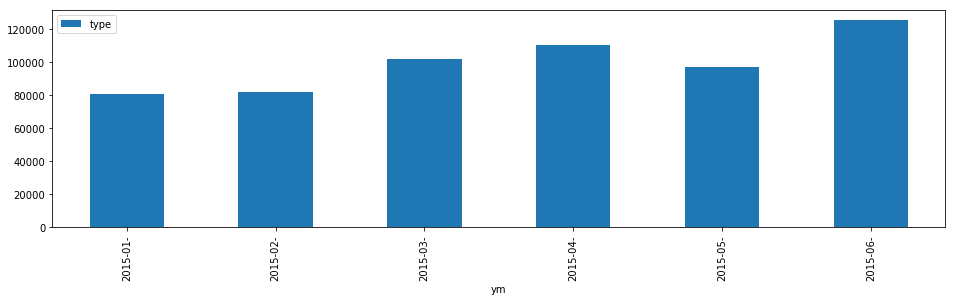

In [39]:
type_ym.plot.bar( figsize=(16, 4))
plt.show()

In [34]:
t_login.shape

(595645, 14)

In [3]:
d0 = t_login.head()

In [28]:
d0['ip'].values

array([1026491, 1026491, 1026491, 1026491, 1026491])

In [30]:
k = d0['ip'].map(lambda x: x in d0['ip'].unique())

In [32]:
k[1] = False
k

0     True
1    False
2     True
3     True
4     True
Name: ip, dtype: bool

In [33]:
d0[k]

,log_id,timelong,device,log_from,ip,city,result,timestamp,type,id,is_scan,is_sec,time,timestamp_online
0,2.618369e+15,5.0,879361,10,1026491,194,1,1.428642e+09,1,116825,True,False,2015-04-10 12:54:19,1.428642e+09
2,8.123343e+15,5.0,879361,10,1026491,194,1,1.427705e+09,1,116825,True,False,2015-03-30 16:38:20,1.427705e+09
3,3.265677e+14,6.0,879361,10,1026491,194,1,1.428309e+09,1,116825,True,False,2015-04-06 16:22:18,1.428309e+09
4,6.684659e+15,4.0,879361,10,1026491,194,1,1.428221e+09,1,116825,True,False,2015-04-05 15:55:01,1.428221e+09


In [13]:
dt = d0[['ip','id','type']].groupby(['ip','id'],as_index=False).count()
dt[['ip','type']].groupby('ip',as_index=False)['type'].agg({'ip_cnt':np.size})

,ip,ip_cnt
0,1026491,2


In [15]:
dict(dt[['ip','type']].groupby('ip',as_index=False)['type'].agg({'ip_cnt':np.size}).values)

{1026491: 2}

In [16]:
dt[['ip','type']].groupby('ip',as_index=False)['type'].agg({'ip_cnt':np.size}).values

array([[1026491,       2]])

In [19]:
d0[['id','timestamp']].values

array([[  1.16825000e+05,   1.42864166e+09],
       [  1.09987000e+05,   1.42880884e+09],
       [  1.16825000e+05,   1.42770470e+09],
       [  1.16825000e+05,   1.42830854e+09],
       [  1.16825000e+05,   1.42822050e+09]])

In [21]:
dict(d0[['id','timestamp']].values)

{109987.0: 1428808845.0, 116825.0: 1428220501.0}